In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | harper
Processing Record 3 of Set 1 | los llanos de aridane
Processing Record 4 of Set 1 | macklin
Processing Record 5 of Set 1 | emba
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | kaeo
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | addi ugri
City not found. Skipping...
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | verkhoyansk
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | kenai
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | mehamn
Processing Record 17 of Set 1 | viedma
Processing Record 18 of Set 1 | santa cruz del sur
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | aksarayskiy
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 1 | mat

Processing Record 35 of Set 4 | victoria
Processing Record 36 of Set 4 | kaili
Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | saint andrews
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | guhagar
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | la rioja
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | mednogorsk
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | penzance
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | lanzhou
Processing Record 50 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | kulti
Processing Record 3 of Set 5 | acapulco
Processing Record 4 of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | talcher
Processing Record 7 of Set 5 | ewa b

Processing Record 29 of Set 8 | parati
Processing Record 30 of Set 8 | college
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | oktyabrskoye
Processing Record 33 of Set 8 | karpathos
Processing Record 34 of Set 8 | pacific grove
Processing Record 35 of Set 8 | matamoros
Processing Record 36 of Set 8 | khatima
Processing Record 37 of Set 8 | sulina
Processing Record 38 of Set 8 | cutzamala
City not found. Skipping...
Processing Record 39 of Set 8 | laukaa
Processing Record 40 of Set 8 | san jose
Processing Record 41 of Set 8 | hojo
Processing Record 42 of Set 8 | dubenskiy
City not found. Skipping...
Processing Record 43 of Set 8 | portland
Processing Record 44 of Set 8 | lerwick
Processing Record 45 of Set 8 | clyde river
Processing Record 46 of Set 8 | lagoa
Processing Record 47 of Set 8 | honiara
Processing Record 48 of Set 8 | cananeia
Processing Record 49 of Set 8 | tabulbah
City not found. Skipping...
Processing Record 50 of Set 8 | byron bay
Processing R

Processing Record 15 of Set 12 | teofilo otoni
Processing Record 16 of Set 12 | port hawkesbury
Processing Record 17 of Set 12 | bargur
Processing Record 18 of Set 12 | coutances
Processing Record 19 of Set 12 | puerto del rosario
Processing Record 20 of Set 12 | kalabo
Processing Record 21 of Set 12 | hanzhong
Processing Record 22 of Set 12 | caravelas
Processing Record 23 of Set 12 | tunduru
City not found. Skipping...
Processing Record 24 of Set 12 | papetoai
Processing Record 25 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 26 of Set 12 | toyooka
Processing Record 27 of Set 12 | tilichiki
Processing Record 28 of Set 12 | mae sai
Processing Record 29 of Set 12 | kasongo
Processing Record 30 of Set 12 | tagusao
Processing Record 31 of Set 12 | nzega
Processing Record 32 of Set 12 | pitiquito
Processing Record 33 of Set 12 | ust-nera
Processing Record 34 of Set 12 | surt
Processing Record 35 of Set 12 | salur
Processing Record 36 of Set 12 | molina
Processing Reco

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,63.09,78,75,1.01,ZA,2021-10-28 20:42:47
1,Harper,4.3750,-7.7169,78.22,84,96,5.82,LR,2021-10-28 20:42:48
2,Los Llanos De Aridane,28.6585,-17.9182,65.95,79,0,6.91,ES,2021-10-28 20:42:49
3,Macklin,52.3334,-109.9348,51.13,18,31,7.70,CA,2021-10-28 20:42:49
4,Emba,48.8264,58.1442,33.55,52,92,8.19,KZ,2021-10-28 20:42:50
5,North Bend,43.4065,-124.2243,74.25,94,90,9.22,US,2021-10-28 20:42:50
6,Kaeo,-35.1000,173.7833,66.33,80,30,9.19,NZ,2021-10-28 20:42:51
7,Hambantota,6.1241,81.1185,78.69,83,92,4.34,LK,2021-10-28 20:42:51
8,Tuktoyaktuk,69.4541,-133.0374,28.40,93,90,5.75,CA,2021-10-28 20:42:52
9,Verkhoyansk,67.5447,133.3850,8.83,92,100,2.80,RU,2021-10-28 20:42:52


In [8]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-10-28 20:42:47,-33.9258,18.4232,63.09,78,75,1.01
1,Harper,LR,2021-10-28 20:42:48,4.3750,-7.7169,78.22,84,96,5.82
2,Los Llanos De Aridane,ES,2021-10-28 20:42:49,28.6585,-17.9182,65.95,79,0,6.91
3,Macklin,CA,2021-10-28 20:42:49,52.3334,-109.9348,51.13,18,31,7.70
4,Emba,KZ,2021-10-28 20:42:50,48.8264,58.1442,33.55,52,92,8.19
5,North Bend,US,2021-10-28 20:42:50,43.4065,-124.2243,74.25,94,90,9.22
6,Kaeo,NZ,2021-10-28 20:42:51,-35.1000,173.7833,66.33,80,30,9.19
7,Hambantota,LK,2021-10-28 20:42:51,6.1241,81.1185,78.69,83,92,4.34
8,Tuktoyaktuk,CA,2021-10-28 20:42:52,69.4541,-133.0374,28.40,93,90,5.75
9,Verkhoyansk,RU,2021-10-28 20:42:52,67.5447,133.3850,8.83,92,100,2.80


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

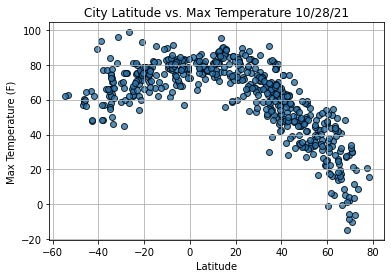

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

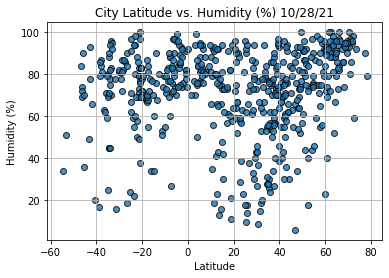

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

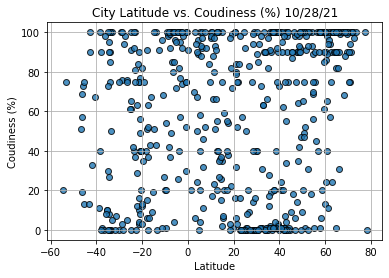

In [15]:
# Build the scatter plots for latitude vs. coudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Coudiness (%) "+ time.strftime("%x"))
plt.ylabel("Coudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

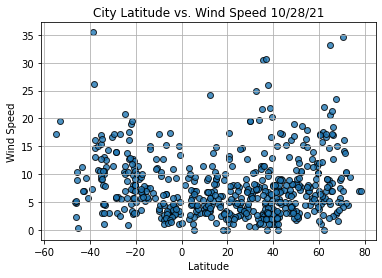

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()